02/1 Update: Finish finding bad fits (fitlog) of F160W. I added an option here that allows you to ignore and include specific gids after an initial run. Make sure there are no errors (by reading fitlog) on other objects. Then copy the fitting params from F160W to F125W and F850LP and rerun!

In [1]:
from runningGALFIT import runGALFIT as g
import pandas as pd
from astropy.io import ascii
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

import sys
import errno

In [2]:
data = pd.read_csv('/Users/rosaliaobrien/research/GALFIT_CLEAR/running_GALFIT/fitting_data.csv')

## Running GALFIT:

In [3]:
errordf = pd.read_csv('/Users/rosaliaobrien/research/GALFIT_CLEAR/running_GALFIT/GALFIT_errors.csv')
gids = errordf[errordf['refit'] == 'yes']['gid'].to_list()
gids

[36838, 14158, 41147]

In [9]:
flter = '160'
data = g.update_csv('fitting_data.csv', 14158, column = 'fitting_region_'+flter, cell_value = 'large')

In [10]:
df = g.make_temp_df(data, [36838, 14158])
df

,ID,zgrism,e_zgrism,E_zgrism,logMgrism,e_logMgrism,E_logMgrism,logsSFR,e_logsSFR,E_logsSFR,...,E_tQ,z50,e_z50,E_z50,field,gid,fitting_region_160,fitting_region_125,fitting_region_850,new
6,GND-36838,0.799,0.002,0.002,10.73,0.03,0.04,-12.4,0.3,0.6,...,0.5,3.6,1.0,0.6,GND,36838,large,masked,masked,yes
12,GND-14158,0.911,0.004,0.005,10.58,0.02,0.02,-11.3,0.1,0.3,...,0.2,1.9,0.4,0.1,GND,14158,large,small,masked,yes


In [11]:
import multiprocessing

# Shortcut to multiprocessing's logger
def error(msg, *args):
    return multiprocessing.get_logger().error(msg, *args)

def mp_run_galfit(gid, fit, field, write_files = False, nearby_gids = None, ignore = None):
    
    '''
    Params
    ------
    gid - int
        Id # of object
    fit - str
        Fitting region
    field - str
        'N' or 'S'
    write_files - bool
        True if you want program to rewrite .feedme file
    nearby_gids - list(int)
        List of nearby gids to include in fit
    '''
    
    print(gid, fit)
    
    try:
        if field == 'GND':
            field_letter = 'N'
            fullfield = 'North'
        if field == 'GSD':
            field_letter = 'S'
            fullfield = 'South'

        if fit == 'masked':
            mask = True
        elif fit != 'masked':
            mask = False
            
    except Exception as error:
        print(error)
        
    try:

        gclass = g(gid, field_letter, flter, fit, nearby_gids = nearby_gids)
        
        if write_files == False:
            print('Making segmentation map...')
            gclass.make_segm(ignore = ignore)
            segmap = str(gid)+'_segm.fits'
            os.rename('/Users/rosaliaobrien/research/GALFIT_CLEAR/running_GALFIT/segm_maps/'+segmap, '/Users/rosaliaobrien/research/GALFIT_CLEAR/running_GALFIT/'+fullfield+'/'+flter+'/'+segmap)
        
        gclass.run_galfit(use_mask = mask, write_files = write_files)

        gclass.plot(used_mask = mask, show_plot = True, save_fig=True, show_object=True, saveas_png = True)
        
        plt.close()
        
    except Exception as error:
        print(error)
        raise error



-----------------------------------------------------------------------------------------
FILTER: 160
-----------------------------------------------------------------------------------------


36838 large
goodsn_3dhst.v4.0.F160W_orig_sci.fits UNITS:  counts
Image already changed to counts
Writing intro...
Creating segmentation map...


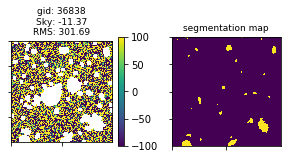

Writing object 36791...
Writing object 36838...
Running GALFIT...
Rewriting galfit.01...
Rerunning GALFIT...
DONE!




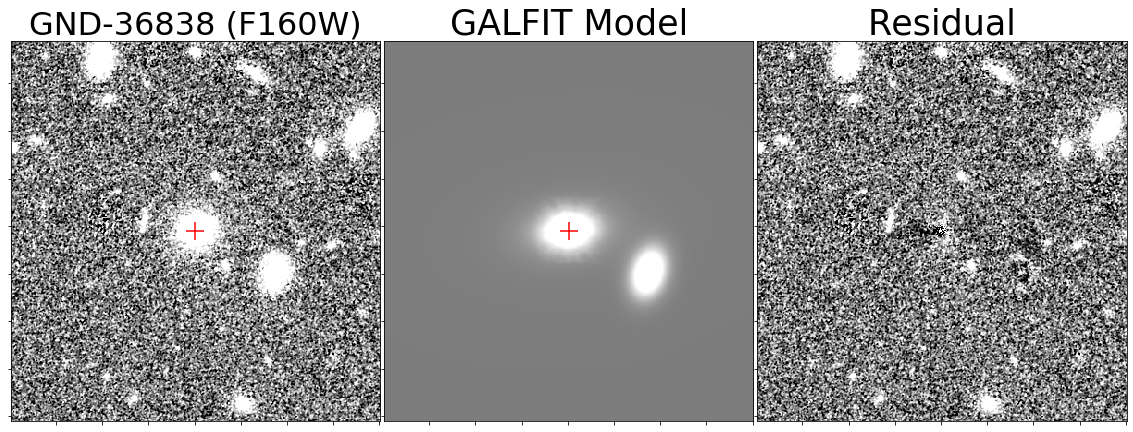

14158 large
goodsn_3dhst.v4.0.F160W_orig_sci.fits UNITS:  counts
Image already changed to counts
Writing intro...
Creating segmentation map...


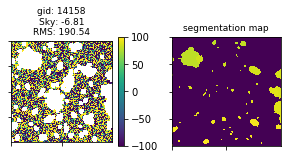

Writing object 14132...
Writing object 14158...
Running GALFIT...
Rewriting galfit.01...
Rerunning GALFIT...
DONE!




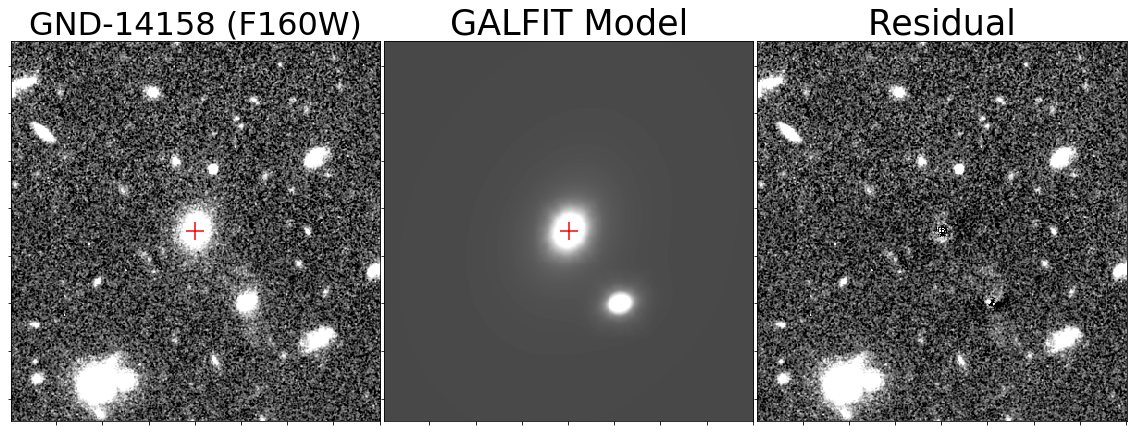

In [12]:
for flter in ['160']:
    print('\n')
    print('-----------------------------------------------------------------------------------------')
    print('FILTER: '+flter)
    print('-----------------------------------------------------------------------------------------')
    print('\n')
    
    tempdf = df
        
    args = [(tempdf.loc[i, 'gid'], tempdf.loc[i, 'fitting_region_'+flter], tempdf.loc[i, 'field']) for i in tempdf.index]
    
    for tple in args:
        mp_run_galfit(tple[0], tple[1], tple[2], write_files = True)

In [ ]:
# for flter in ['160']:
#     print('\n')
#     print('-----------------------------------------------------------------------------------------')
#     print('FILTER: '+flter)
#     print('-----------------------------------------------------------------------------------------')
#     print('\n')
    
#     tempdf = data

#     with multiprocessing.Pool(processes=1) as pool:
        
#         args = [(tempdf.loc[i, 'gid'], tempdf.loc[i, 'fitting_region_'+flter], tempdf.loc[i, 'field']) for i in tempdf.index]
#         pool.starmap(mp_run_galfit, args)

## Print each filter for each object to compare:

In [37]:
os.chdir('/Users/rosaliaobrien/research/GALFIT_CLEAR/scripts/')

In [38]:
from get_output_data import *

In [39]:
fitsn = [data[data['field'] == 'GND']['fitting_region_160'], data[data['field'] == 'GND']['fitting_region_125'], data[data['field'] == 'GND']['fitting_region_850']]
gidsn = data[data['field'] == 'GND']['gid'].tolist()
data160_north, data125_north, data850_north = get_output_data('North', gidsn, fitsn, diff_fitting_regions = True)

fitss = [data[data['field'] == 'GSD']['fitting_region_160'], data[data['field'] == 'GSD']['fitting_region_125'], data[data['field'] == 'GSD']['fitting_region_850']]
gidss = data[data['field'] == 'GSD']['gid'].tolist()
data160_south, data125_south, data850_south = get_output_data('South', gidss, fitss, diff_fitting_regions = True)

North 160
North 125
Not using galfit.02
Using galfit.01 for id14158
Not using galfit.02
Using galfit.01 for id24177
Not using galfit.02
Using galfit.01 for id23081
Not using galfit.02
Using galfit.01 for id33453
Not using galfit.02
Using galfit.01 for id17735
Not using galfit.02
Using galfit.01 for id17599
North 850
Not using galfit.02
Using galfit.01 for id24177
Not using galfit.02
Using galfit.01 for id21738
South 160
South 125
South 850


In [40]:
def r_circ(r_effs, axis_ratios):
    r_circ = r_effs*np.sqrt(axis_ratios)
    return r_circ

for field in ['North', 'South']:
    
    if field == 'North':
        data160 = data160_north
        data125 = data125_north
        data850 = data850_north
        
    if field == 'South':
        data160 = data160_south
        data125 = data125_south
        data850 = data850_south
    
    data160['circ_radius'] = r_circ(data160['radius'], data160['axis_ratio'])
    data125['circ_radius'] = r_circ(data125['radius'], data125['axis_ratio'])
    data850['circ_radius'] = r_circ(data850['radius'], data850['axis_ratio'])

    #merge dataframes based "on" gid #'s
    outputdata = data160.merge(data125, on='gid', how='inner')
    outputdata = outputdata.merge(data850, on='gid', how='inner')

    #rename columns
    outputdata = outputdata.rename(columns ={"radius_x": 'radius_160', 'radius_y': 'radius_125', 'radius': 'radius_850'})
    outputdata = outputdata.rename(columns ={"mag_x": 'mag_160', 'mag_y': 'mag_125', 'mag': 'mag_850'})
    outputdata = outputdata.rename(columns ={"sersic_index_x": 'sersic_index_160', 'sersic_index_y': 'sersic_index_125', 'sersic_index': 'sersic_index_850'})
    outputdata = outputdata.rename(columns ={"axis_ratio_x": 'axis_ratio_160', 'axis_ratio_y': 'axis_ratio_125', 'axis_ratio': 'axis_ratio_850'})
    outputdata = outputdata.rename(columns ={"PA_x": 'PA_160', 'PA_y': 'PA_125', 'PA': 'PA_850'})
    outputdata = outputdata.rename(columns ={"circ_radius_x": 'circ_radius_160', 'circ_radius_y': 'circ_radius_125', 'circ_radius': 'circ_radius_850'})

    #insert new difference columns
    outputdata.insert(19, "125-160", outputdata['circ_radius_125']-outputdata['circ_radius_160'], True)
    outputdata.insert(19, "850-160", outputdata['circ_radius_850']-outputdata['circ_radius_160'], True)

#     data['paper'] = 0

#     for i, g in zip(data.index, data['gid']):
#         if g in secpaper['gid'].tolist():
#             data.at[i, 'paper'] = 2
#         if g in firstpaper['gid'].tolist():
#             data.at[i, 'paper'] = 1       

    outputdata.to_csv('/Users/rosaliaobrien/research/GALFIT_CLEAR/running_galfit/'+field+'/output_data_all.csv', index=False)

# data.sort_values(by = 'circ_radius_850')

## Compare sigma images:

In [ ]:
# def compare_sigmas(gidlist, fullfield, flter):
    
#     os.chdir('/Users/rosaliaobrien/research/GALFIT_CLEAR/running_GALFIT/'+fullfield+'/'+flter)

#     for gid in gidlist:
#         try:
#             image0 = 'outputs/pngs_nosigma/output_gid'+str(gid)+'.png'
#             image3 = 'outputs/pngs_whtsigma/output_gid'+str(gid)+'.png'
#             images = [Image.open(x) for x in [image0, image3]]

#         except OSError:
#             print(str(gid)+' missing a png')
#             image0 = 'outputs/pngs_nosigma/output_gid'+str(gid)+'.png'
#             images = [Image.open(x) for x in [image0]]

#         widths, heights = zip(*(i.size for i in images))

#         total_width = max(widths)
#         max_height = sum(heights)

#         new_im = Image.new('RGB', (total_width, max_height))
#         d = ImageDraw.Draw(new_im)

#         fnt = ImageFont.truetype('/Applications/MAMP/Library/lib/ruby/2.3.0/rdoc/generator/template/darkfish/fonts/SourceCodePro-Regular.ttf', 20)

#         y_offset = 0

#         for im in images:
#             new_im.paste(im, (0,y_offset))
#             y_offset += im.size[1]

#         d.text((0,0), "No Sigma Image", font=fnt, fill=(255,0,0,255))
#         d.text((0,im.size[1]), "Using .wht", font=fnt, fill=(255,0,0,255))

#         new_im.save('outputs/comparing_sigmas/gid'+str(gid)+'.jpg')

In [ ]:
# pwd